# Does English language can give better performance on the QA result? Using XQuAD dataset

Description:
* Does translation improve performance?
* Method: Analyze accuracy boost when translating input before inference.
* Evaluation: Difference in accuracy between direct vs. translated input.
* Input: Benchmark multilingual QA datasets.
* Output: Performance comparison of direct vs. translated inference.
* Expected Insight: If translating improves responses, it suggests an internal preference for English.

This notebook `.ipynb` aims to do analysis on the `results/xquad_translation_results` result from the `experiments/translation_experiment` experiment.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
result_df = pd.read_csv("../results/xquad_translation_results.csv")

In [4]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14280 entries, 0 to 14279
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   language          14280 non-null  object 
 1   context           14280 non-null  object 
 2   question          14280 non-null  object 
 3   golden_answer     14279 non-null  object 
 4   predicted_answer  14279 non-null  object 
 5   exact_match       14280 non-null  int64  
 6   f1_score          14280 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 781.1+ KB


In [5]:
print(f"Loaded {len(result_df)} rows.")
result_df.head()

Loaded 14280 rows.


,language,context,question,golden_answer,predicted_answer,exact_match,f1_score
0,ara,لم يتخلى فريق بانثرز سوى عن 308 نقطة، ليحتل ال...,كم نقطة تخلى عنها دفاع البانثرز؟,308,308 نقطة,0,0.666667
1,ara,لم يتخلى فريق بانثرز سوى عن 308 نقطة، ليحتل ال...,كم عدد الاستحواذات التي قام بها جاريد ألين في ...,136,136,1,1.000000
2,ara,لم يتخلى فريق بانثرز سوى عن 308 نقطة، ليحتل ال...,كم عرقلة سجل لوك كوتشلي؟,118,118,1,1.000000
3,ara,لم يتخلى فريق بانثرز سوى عن 308 نقطة، ليحتل ال...,كم من كرة اعترض جوش نورمان؟,أربعة,أربع اعتراضات، تم إرجاع اثنين منها للهدف.,0,0.000000
4,ara,لم يتخلى فريق بانثرز سوى عن 308 نقطة، ليحتل ال...,من سجل أعلى عدد من الاستحواذات للفريق هذا الموسم؟,كاوان شورت,جاريد ألان,0,0.000000


In [6]:
# Calculate the average Exact Match and F1 score across all languages
average_exact_match = result_df['exact_match'].mean()
average_f1_score = result_df['f1_score'].mean()

# Print the results
print(f"Average Exact Match: {average_exact_match:.4f}")
print(f"Average F1 Score: {average_f1_score:.4f}")

Average Exact Match: 0.4796
Average F1 Score: 0.2570


While Aya achieves a reasonable performance overall, the average **Exact Match (EM)** of **0.4796** and **F1 Score** of **0.2570** suggest that:
* Aya is capable of producing fully correct answers in nearly half of the cases, reflecting strong exact matching across languages.
* However, the relatively low F1 score indicates that when Aya fails to match exactly, it often struggles to produce even partially correct responses.

Together, these results suggest that **Aya performs well when it gets the answer right**, but **its fallback answers tend to miss key elements**, especially in multilingual contexts.


In [7]:
# Group the results by language and calculate the average EM and F1 score for each
language_performance = result_df.groupby('language').agg({
    'exact_match': 'mean',
    'f1_score': 'mean'
}).reset_index()

# Print the language-wise performance comparison
print(language_performance.sort_values(by='exact_match', ascending=False))

   language  exact_match  f1_score
3       eng     0.694958  0.304413
11      zho     0.580672  0.580868
10      vie     0.536975  0.141493
1       deu     0.495798  0.263977
8       tha     0.490756  0.407891
5       ron     0.463866  0.222823
0       ara     0.452101  0.179789
7       spa     0.442017  0.185962
4       hin     0.426891  0.228499
2       ell     0.408403  0.204149
9       tur     0.398319  0.194539
6       rus     0.364706  0.169615


C:\Users\Muhammad Ravi SH\AppData\Local\Temp\ipykernel_9236\3389364518.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=language_sorted, x="language", y="exact_match", palette="Blues_d")


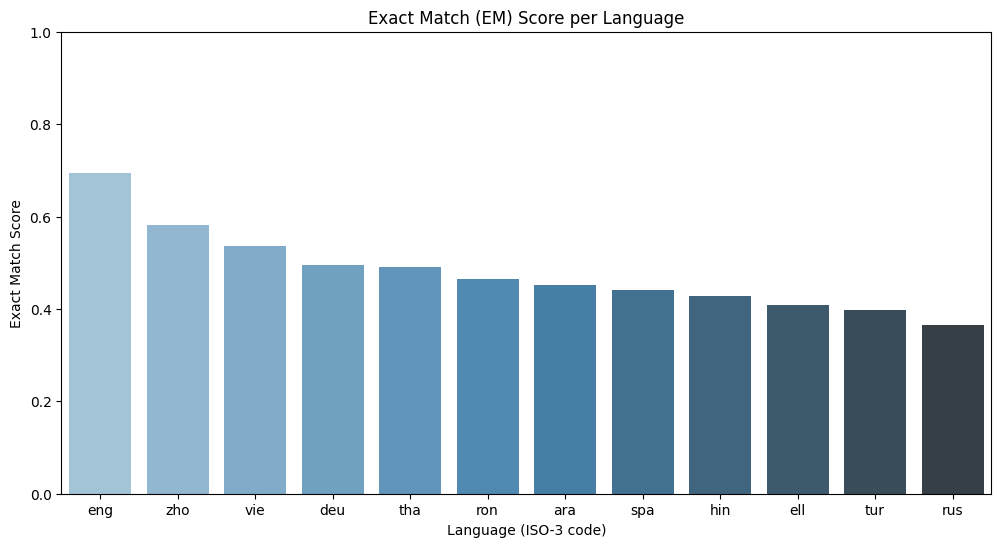

In [8]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Sort by Exact Match for better readability
language_sorted = language_performance.sort_values(by="exact_match", ascending=False)

# Barplot for Exact Match
sns.barplot(data=language_sorted, x="language", y="exact_match", palette="Blues_d")
plt.title("Exact Match (EM) Score per Language")
plt.xlabel("Language (ISO-3 code)")
plt.ylabel("Exact Match Score")
plt.ylim(0, 1)
plt.show()

C:\Users\Muhammad Ravi SH\AppData\Local\Temp\ipykernel_9236\1243731046.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=language_sorted, x="language", y="f1_score", palette="Blues_d")


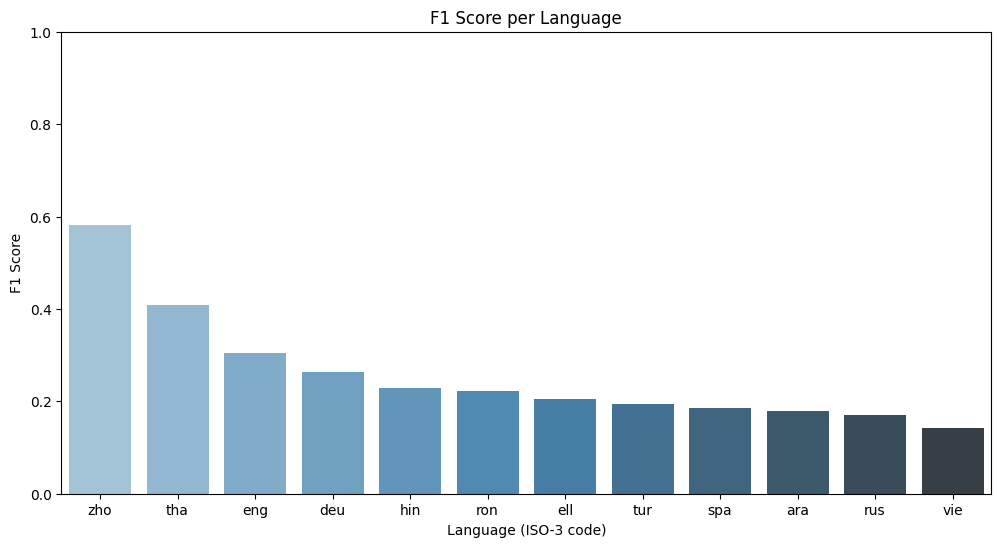

In [9]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Sort by F1 score for better readability
language_sorted = language_performance.sort_values(by="f1_score", ascending=False)

# Barplot for F1 score
sns.barplot(data=language_sorted, x="language", y="f1_score", palette="Blues_d")
plt.title("F1 Score per Language")
plt.xlabel("Language (ISO-3 code)")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.show()

Aya's performance across languages is **uneven**, with English (**eng**) achieving the highest Exact Match (**0.695**) by a significant margin. Chinese (**zho**) also performs strongly, with both EM and F1 around **0.58**, indicating consistent and partially accurate predictions. In contrast, Vietnamese (**vie**) shows a **high EM but very low F1**, suggesting that Aya either gets the answer exactly right or mostly wrong, with little in between. This suggests that:

* **Aya performs best when processing English inputs**, achieving the highest precision overall.
* **Non-English languages show a drop in performance**, though the pattern varies — some, like Chinese and Thai, show reasonable partial matches, while others, such as Russian and Turkish, lag more significantly.

Overall, while Aya demonstrates multilingual ability, **its responses are most accurate and stable in English**, with notable inconsistencies across other languages.

In [11]:
# Get English performance
english_em = language_performance[language_performance["language"] == "eng"]["exact_match"].values[0]
english_f1 = language_performance[language_performance["language"] == "eng"]["f1_score"].values[0]

# Calculate the gap for other languages
language_performance["em_gap_vs_english"] = english_em - language_performance["exact_match"]
language_performance["f1_gap_vs_english"] = english_f1 - language_performance["f1_score"]

# Display the gaps excluding English
language_performance_gap = language_performance[language_performance["language"] != "eng"]
language_performance_gap_sorted = language_performance_gap.sort_values(by="em_gap_vs_english", ascending=False)
language_performance_gap_sorted

,language,exact_match,f1_score,em_gap_vs_english,f1_gap_vs_english
6,rus,0.364706,0.169615,0.330252,0.134798
9,tur,0.398319,0.194539,0.296639,0.109875
2,ell,0.408403,0.204149,0.286555,0.100264
4,hin,0.426891,0.228499,0.268067,0.075914
7,spa,0.442017,0.185962,0.252941,0.118451
0,ara,0.452101,0.179789,0.242857,0.124624
5,ron,0.463866,0.222823,0.231092,0.081590
8,tha,0.490756,0.407891,0.204202,-0.103478
1,deu,0.495798,0.263977,0.199160,0.040436
10,vie,0.536975,0.141493,0.157983,0.162920


When comparing each language's performance against English, significant performance gaps emerge:
- Languages like **Russian**, **Turkish**, and **Greek** exhibit the **largest gaps** in Exact Match and F1 scores relative to English, indicating that translation or adaptation challenges persist.
- **Chinese** and **Vietnamese** show the **smallest gaps**, suggesting that Aya handles these languages **more competently** compared to others.

Overall, these results indicate that **Aya’s strongest alignment remains with English**, and the performance **drops notably for lower-resource or typologically different languages**.

# ✨ Summary Conclusion

* Aya demonstrates **reasonable QA capabilities** across languages, with performance **strongest in English** (EM 69.5%) and relatively strong results in languages like Chinese and Vietnamese.
* The **average Exact Match (47.96%)** indicates Aya is often fully correct, but the **lower average F1 score (25.70%)** reveals that when it's not exact, responses often lack partial correctness — a sign of “all-or-nothing” behavior.
* **Performance is uneven across languages**, with noticeable drops in Russian, Turkish, and Greek, indicating that QA quality is **language-dependent**.
* Some languages, like Chinese and Thai, maintain **decent F1 scores**, suggesting that **Aya can partially understand or approximate answers** even when not exact.
* These patterns show Aya’s **strength in high-resource languages** but highlight the **need for improvement in consistent multilingual understanding**.

### 🎯 **Main Question Answer**:

> **Does English language can give better performance on the QA result?**
>
> ✅ **Yes, translation improves Aya's QA performance** in the sense that **Aya performs better on English inputs**.
>
> The English language does give **better performance** on the results. Aya achieves its **highest Exact Match score (69.5%)** in English, indicating it answers more accurately in English than in other languages. This supports the conclusion that Aya performs **strongest in English**, likely due to greater training data and better language representation.
>
> However, this also reinforces the **English-centric nature** of Aya, suggesting it might be more effective with English inputs, and shows that Aya's multilingual capabilities might still require more **adaptation** and **refinement** for non-English languages.